In [1]:
from fp2graph import *
from shapely import Polygon
import skimage.measure as meas
from sklearn.cluster import KMeans
import plotly.express as px
import re
from enum import Enum

from helpers import *

In [2]:
PATH = 'plans/fp_ostwald11_f3_2.png'
f = FloorPlan2Graph(PATH)

In [3]:
[2]*3

[2, 2, 2]

In [4]:
f.image2tensor()
f.segment_tensor()

In [5]:
f.further_segment_doors()

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 2 Axes>)

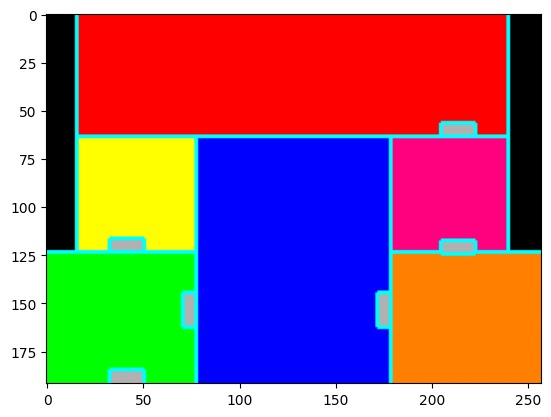

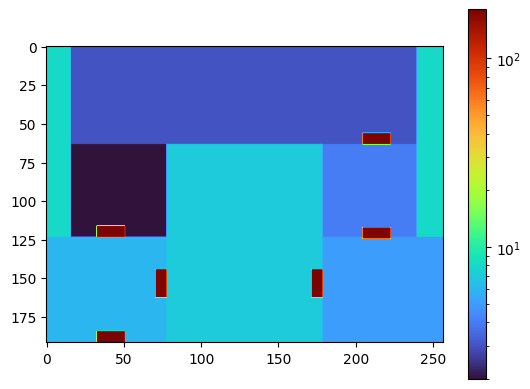

In [6]:
f.view_plan_segments()

In [7]:
f.array2shapely()

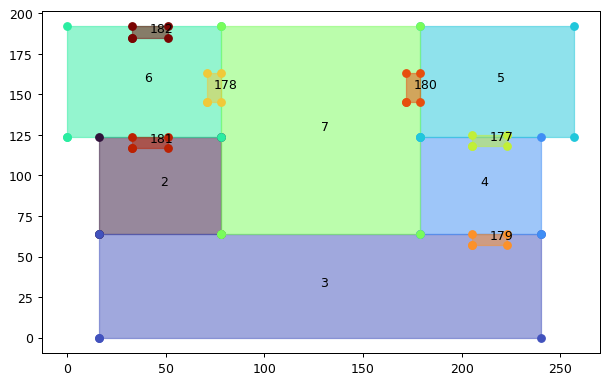

In [8]:
f.view_plan_shapely();

<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

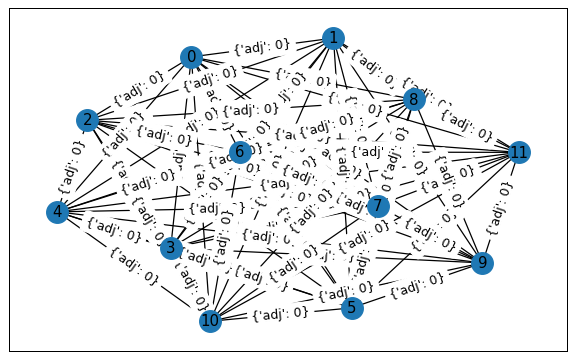

In [9]:
f.init_graph()
f.view_graph()

In [21]:
type(f.CG)

networkx.classes.graph.Graph

In [10]:
for node, attributes in f.CG.nodes(data=True):
    print(f"Node {node} attributes: {attributes}")

Node 0 attributes: {'type': <RegionType.ROOM: 0>, 'label': 2}
Node 1 attributes: {'type': <RegionType.ROOM: 0>, 'label': 3}
Node 2 attributes: {'type': <RegionType.ROOM: 0>, 'label': 4}
Node 3 attributes: {'type': <RegionType.ROOM: 0>, 'label': 5}
Node 4 attributes: {'type': <RegionType.ROOM: 0>, 'label': 6}
Node 5 attributes: {'type': <RegionType.ROOM: 0>, 'label': 7}
Node 6 attributes: {'type': <RegionType.DOOR: 1>, 'label': 177}
Node 7 attributes: {'type': <RegionType.DOOR: 1>, 'label': 178}
Node 8 attributes: {'type': <RegionType.DOOR: 1>, 'label': 179}
Node 9 attributes: {'type': <RegionType.DOOR: 1>, 'label': 180}
Node 10 attributes: {'type': <RegionType.DOOR: 1>, 'label': 181}
Node 11 attributes: {'type': <RegionType.DOOR: 1>, 'label': 182}


In [11]:
door_adj_nodes = []
door_adj_labels = []

for node_ix, attrs in f.CG.nodes(data=True):
    if attrs["type"] == RegionType.DOOR:
        neighbors = list(nx.bfs_edges(f.CG, source=node_ix, depth_limit=1))
        # print(attrs["label"], neighbors)
        for pair in neighbors:
            if f.CG.edges[pair]["adj"] == 0:
                ni = pair[0]
                nj = pair[1]
                adj_val = check_adjacency(
                    f.regions[ni].shape,
                    f.regions[nj].shape)
                if adj_val:
                    door_adj_labels.append((f.CG.nodes[ni]['label'], f.CG.nodes[nj]['label']))
                    door_adj_nodes.append((ni, nj))
                    
                    print(f.CG.nodes[ni]['type'], f.CG.nodes[nj]['type'])
                    print(f.CG.nodes[ni]['label'], f.CG.nodes[nj]['label'])
                
                f.CG.edges[pair]["adj"] = adj_val

RegionType.DOOR RegionType.ROOM
177 4
RegionType.DOOR RegionType.ROOM
177 5
RegionType.DOOR RegionType.ROOM
178 6
RegionType.DOOR RegionType.ROOM
178 7
RegionType.DOOR RegionType.ROOM
179 3
RegionType.DOOR RegionType.ROOM
179 4
RegionType.DOOR RegionType.ROOM
180 5
RegionType.DOOR RegionType.ROOM
180 7
RegionType.DOOR RegionType.ROOM
181 2
RegionType.DOOR RegionType.ROOM
181 6
RegionType.DOOR RegionType.ROOM
182 6


In [12]:
door_adj_nodes

[(6, 2),
 (6, 3),
 (7, 4),
 (7, 5),
 (8, 1),
 (8, 2),
 (9, 3),
 (9, 5),
 (10, 0),
 (10, 4),
 (11, 4)]

In [13]:
grouped_tuples = {}
for tup in door_adj_nodes:
    first_item = tup[0]
    if first_item not in grouped_tuples:
        grouped_tuples[first_item] = [tup[1]]
    else:
        grouped_tuples[first_item].append(tup[1])

In [14]:
grouped_tuples.values()

dict_values([[2, 3], [4, 5], [1, 2], [3, 5], [0, 4], [4]])

In [15]:
prelim_edges = {tuple(i): {"adj": 1} for i in grouped_tuples.values()}
edges  = {key: value for key, value in prelim_edges.items() if len(key) > 1}

In [16]:
for edge in f.CG.edges(data=True):
    print(f"Edge {edge[0]} - {edge[1]} attributes: {edge[2]}")

Edge 0 - 1 attributes: {'adj': 0}
Edge 0 - 2 attributes: {'adj': 0}
Edge 0 - 3 attributes: {'adj': 0}
Edge 0 - 4 attributes: {'adj': 0}
Edge 0 - 5 attributes: {'adj': 0}
Edge 0 - 6 attributes: {'adj': 0}
Edge 0 - 7 attributes: {'adj': 0}
Edge 0 - 8 attributes: {'adj': 0}
Edge 0 - 9 attributes: {'adj': 0}
Edge 0 - 10 attributes: {'adj': 1}
Edge 0 - 11 attributes: {'adj': 0}
Edge 1 - 2 attributes: {'adj': 0}
Edge 1 - 3 attributes: {'adj': 0}
Edge 1 - 4 attributes: {'adj': 0}
Edge 1 - 5 attributes: {'adj': 0}
Edge 1 - 6 attributes: {'adj': 0}
Edge 1 - 7 attributes: {'adj': 0}
Edge 1 - 8 attributes: {'adj': 1}
Edge 1 - 9 attributes: {'adj': 0}
Edge 1 - 10 attributes: {'adj': 0}
Edge 1 - 11 attributes: {'adj': 0}
Edge 2 - 3 attributes: {'adj': 0}
Edge 2 - 4 attributes: {'adj': 0}
Edge 2 - 5 attributes: {'adj': 0}
Edge 2 - 6 attributes: {'adj': 1}
Edge 2 - 7 attributes: {'adj': 0}
Edge 2 - 8 attributes: {'adj': 1}
Edge 2 - 9 attributes: {'adj': 0}
Edge 2 - 10 attributes: {'adj': 0}
Edge 2 - 

In [17]:
labels = {node: f.CG.nodes[node]['label'] for node in f.CG.nodes}
labels

{0: 2,
 1: 3,
 2: 4,
 3: 5,
 4: 6,
 5: 7,
 6: 177,
 7: 178,
 8: 179,
 9: 180,
 10: 181,
 11: 182}

{0: Text(-0.31699902163599203, 0.21420805054127312, '2'),
 1: Text(0.35460443608742637, 0.005690456488008412, '3'),
 2: Text(-0.1861482109854655, -0.5045122754732256, '4'),
 3: Text(-0.8075391557409608, 0.5754414122860824, '5'),
 4: Text(0.9793810980160457, -0.10086169868912065, '6'),
 5: Text(-0.7088484003070074, -0.7309033916283572, '7'),
 6: Text(0.31537846812710013, 0.8374001083482204, '177'),
 7: Text(0.825533026083107, 0.5420994230609342, '178'),
 8: Text(0.09946931020033699, -0.9999999999999999, '179'),
 9: Text(-0.2555993521322912, 0.9456111560389788, '180'),
 10: Text(0.677786601736833, -0.6867418650765797, '181'),
 11: Text(-0.9770187994491366, -0.09743137589620736, '182')}

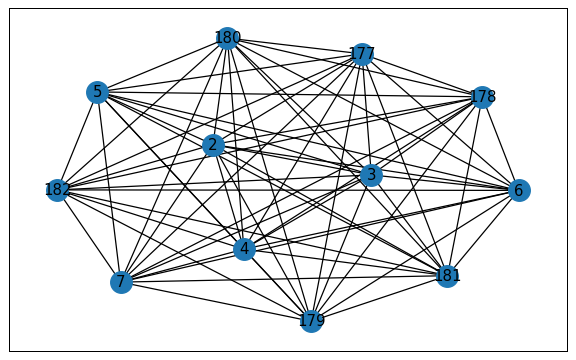

In [18]:
fig = plt.figure(figsize=SIZE,  dpi=90)

pos = nx.spring_layout(f.CG)
nx.draw_networkx_nodes(f.CG, pos,)
nx.draw_networkx_edges(f.CG, pos, )
nx.draw_networkx_labels(f.CG, pos, labels=labels)
# f.CG_edge_labels = nx.draw_networkx_edge_labels(f.CG, pos)


<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

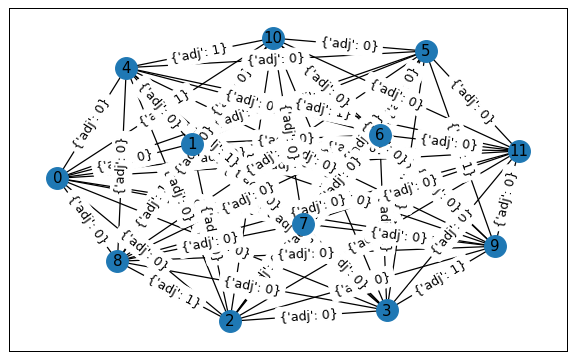

In [19]:
f.view_graph()

In [20]:
for n in f.CG.nodes:
    neighbors = list(nx.bfs_edges(f.CG, source=0, depth_limit=1))
    for pair in neighbors:
        if f.CG.edges[pair]["adj"] == 0:
            adj_val = check_adjacency(
                f.regions[pair[0]].shape,
                f.regions[pair[1]].shape)
            
            f.CG.edges[pair]["adj"] = adj_val
